In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import matplotlib.pyplot as plt
import cv2 as cv

[179 168 166]


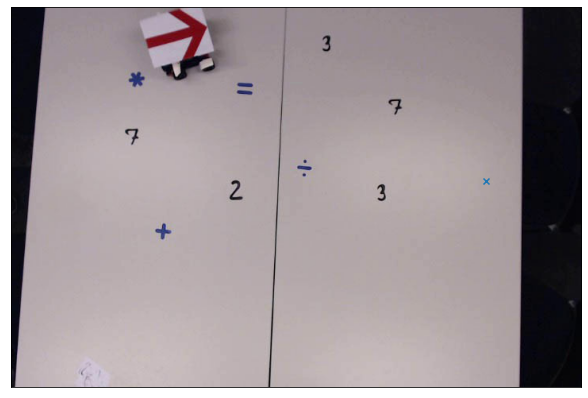

In [3]:
img = imread('data/frame/frame32.jpeg')

test_x = 600
test_y = 220
print(img[test_y, test_x, :])

fig, ax = plt.subplots(figsize=(15, 7))
ax.imshow(img)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
ax.scatter(test_x, test_y, marker='x')
plt.show()

In [27]:
def center(contour):
    
    M = cv.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return (cX, cY)

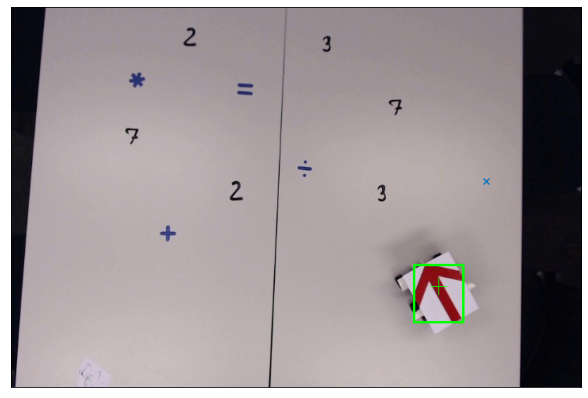

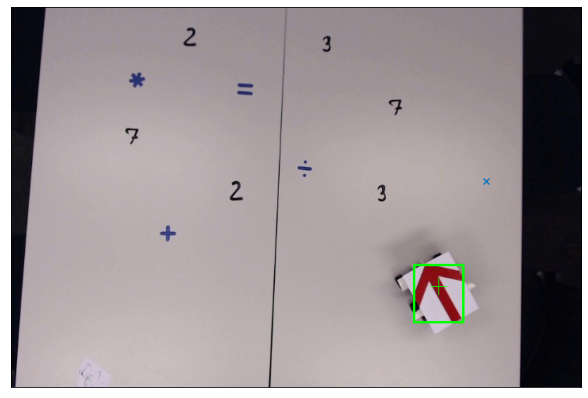

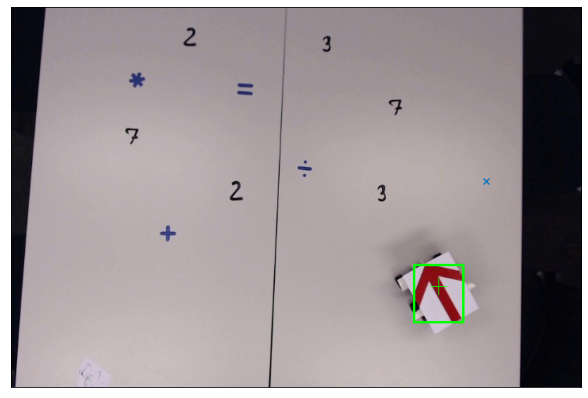

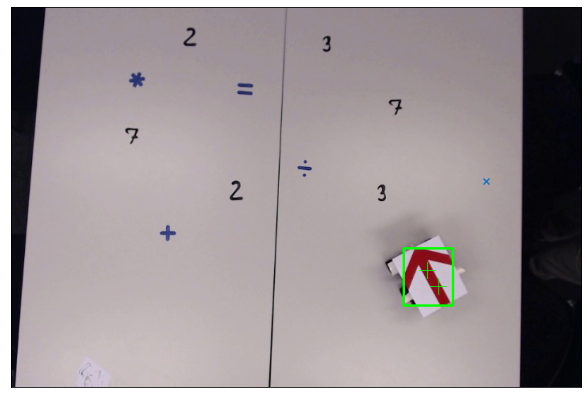

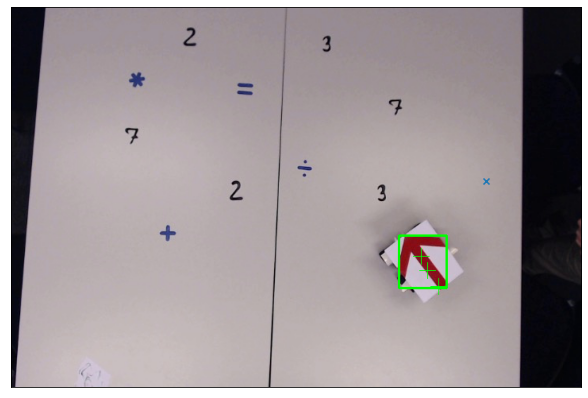

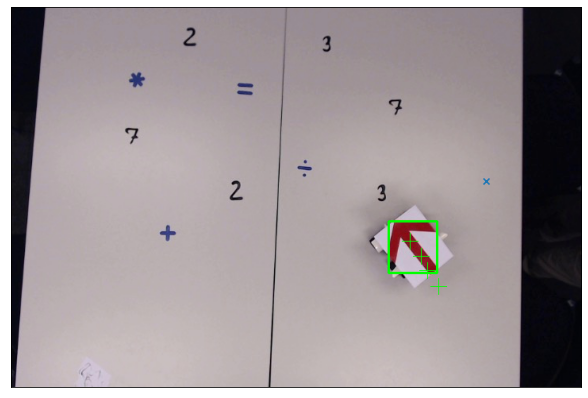

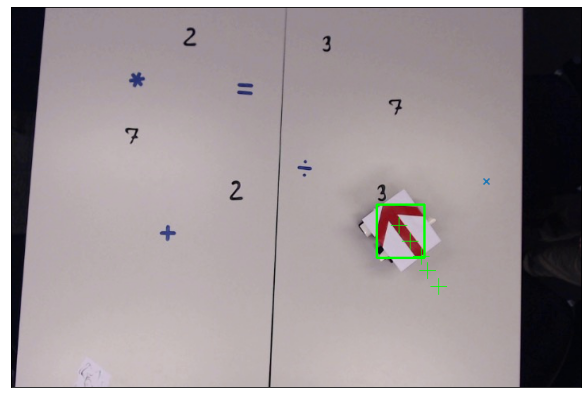

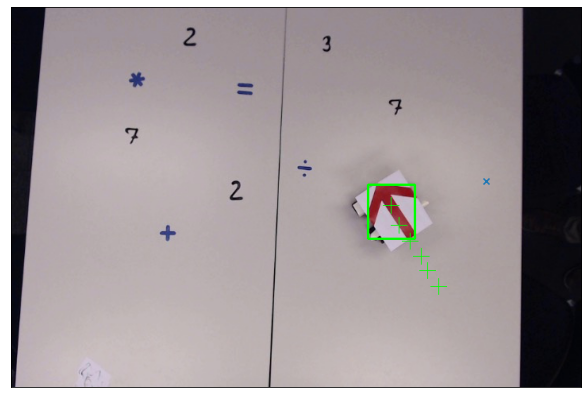

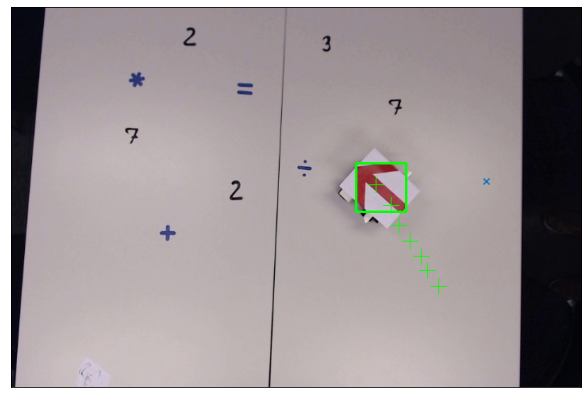

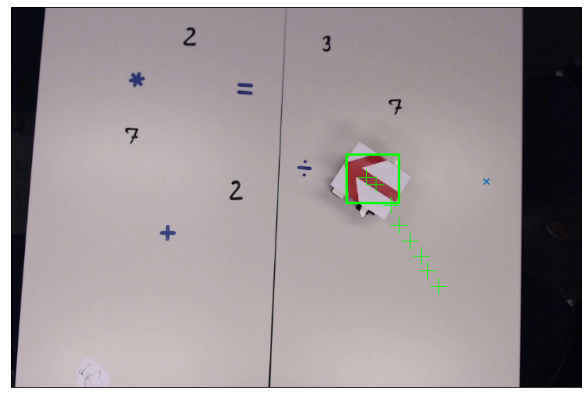

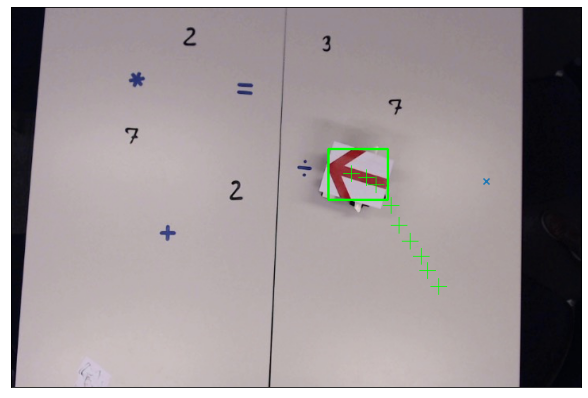

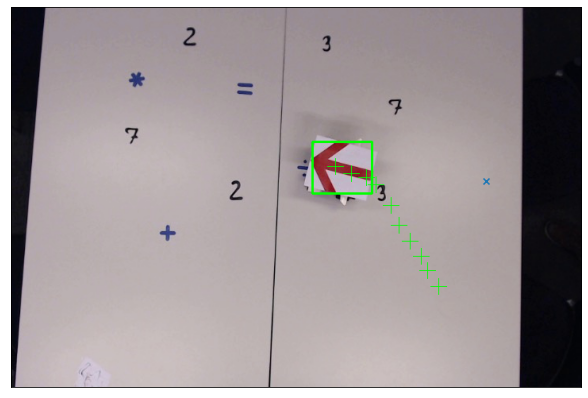

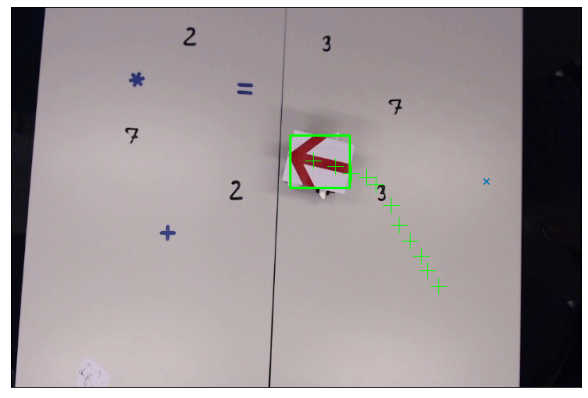

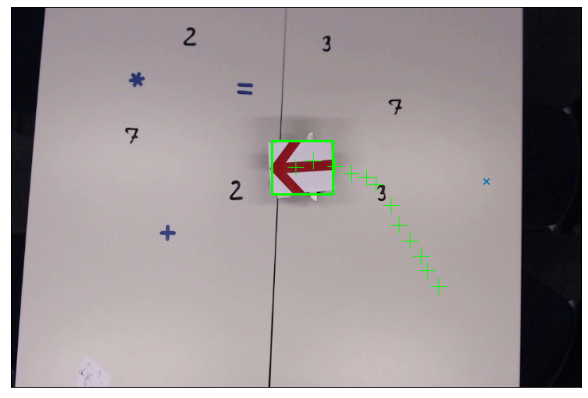

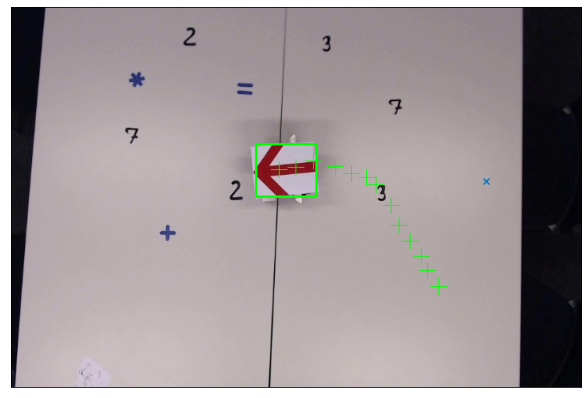

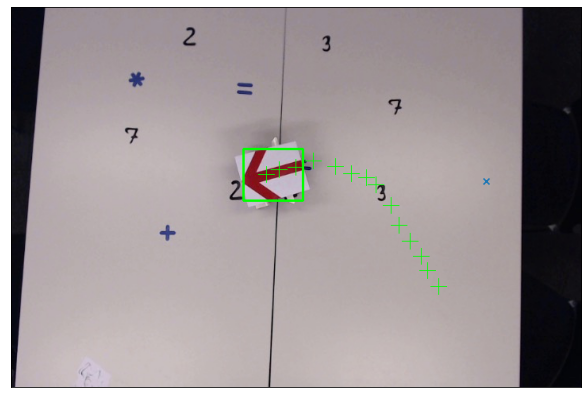

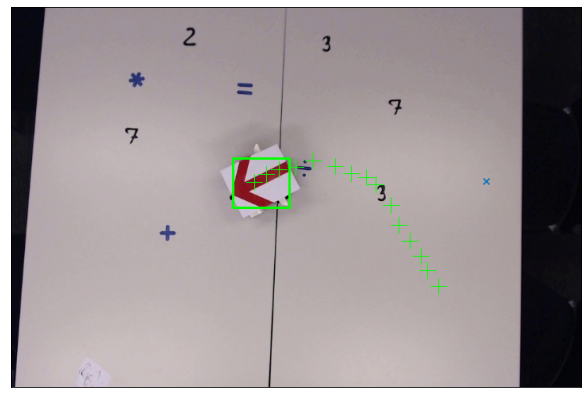

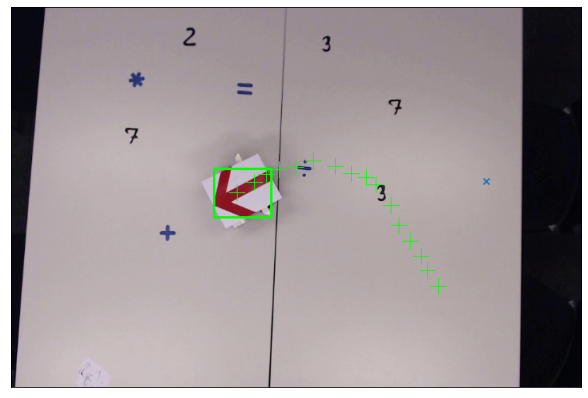

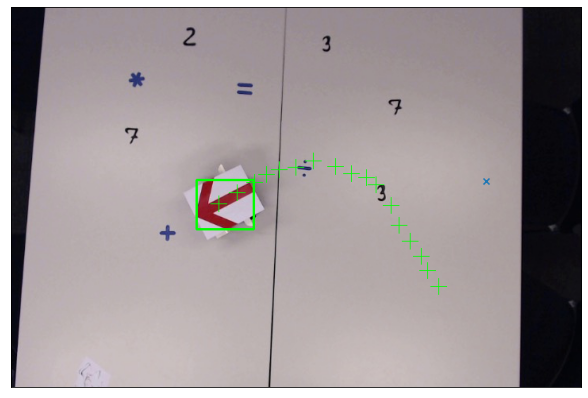

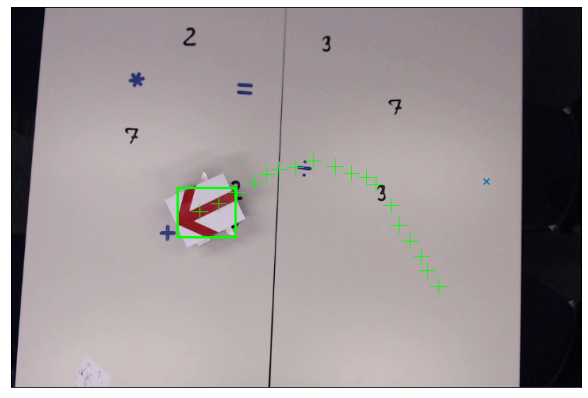

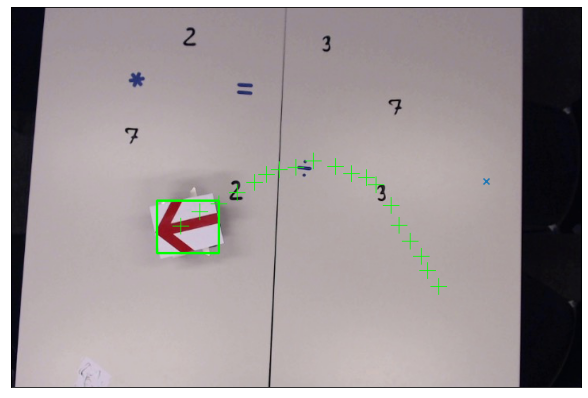

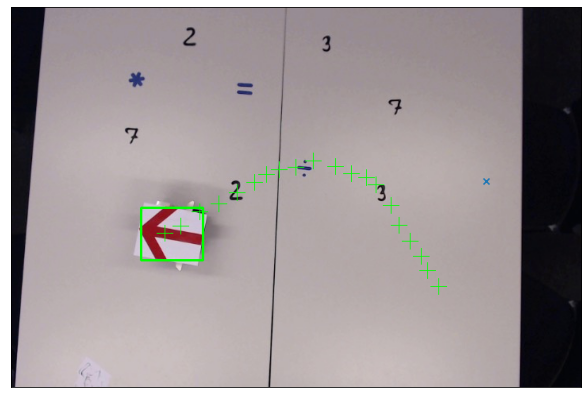

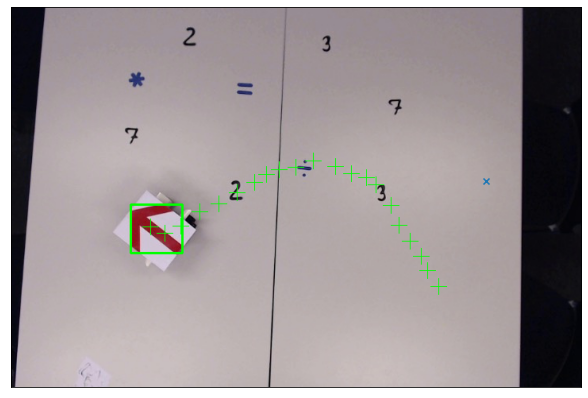

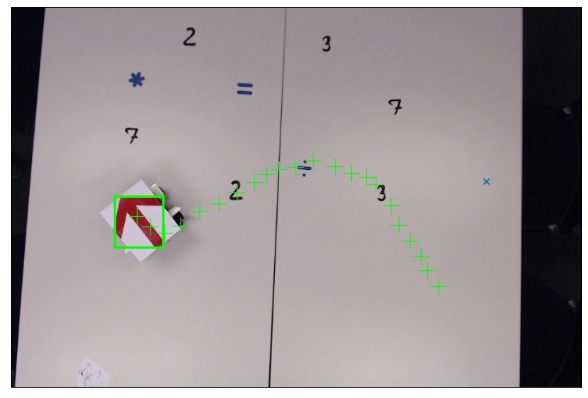

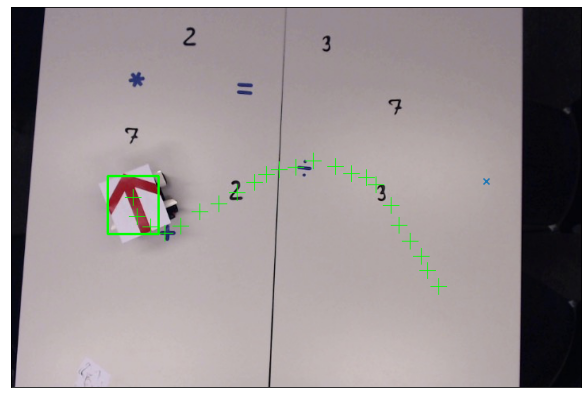

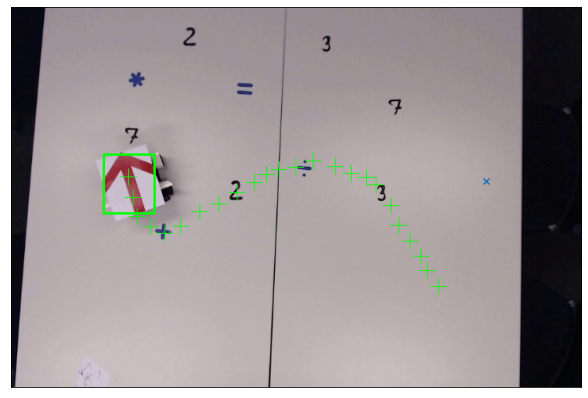

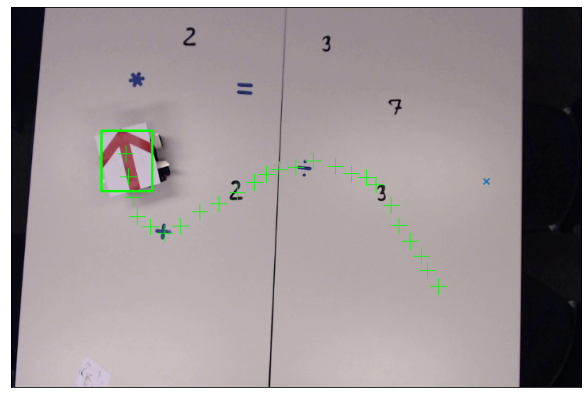

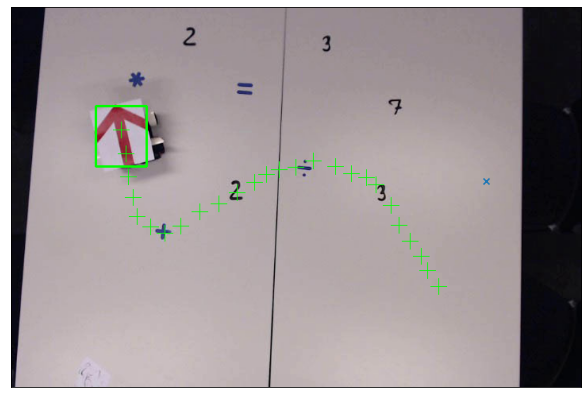

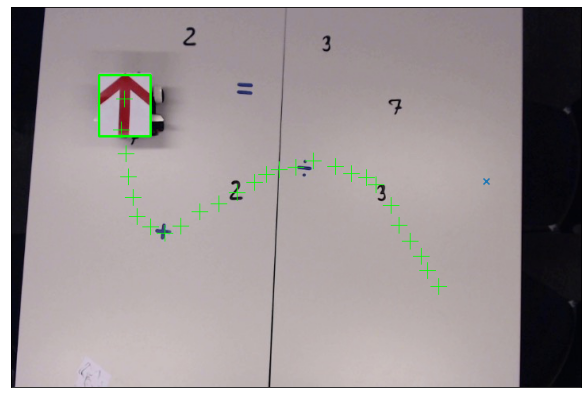

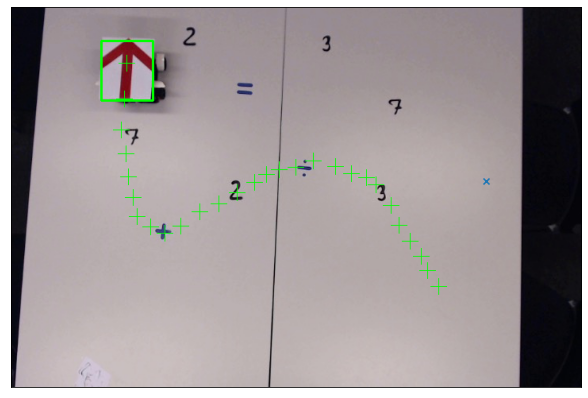

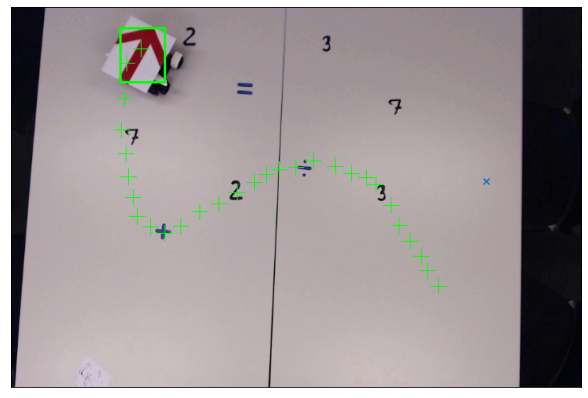

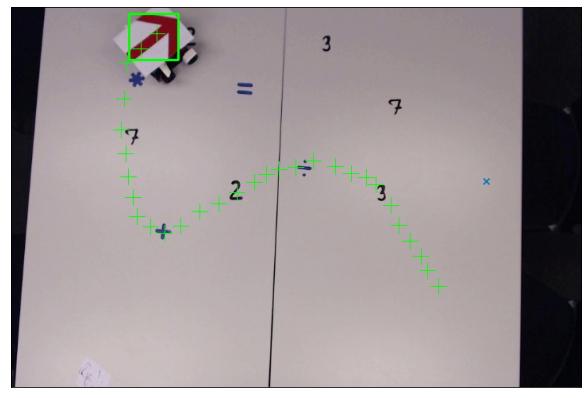

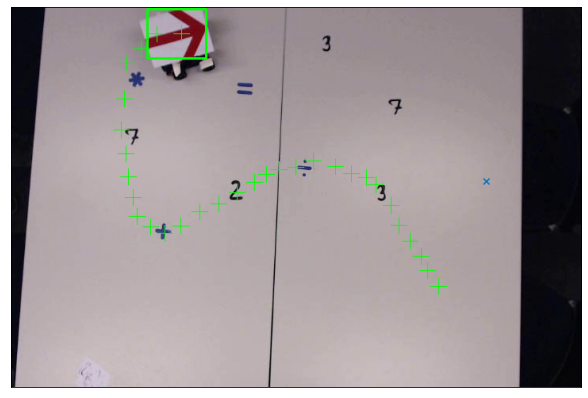

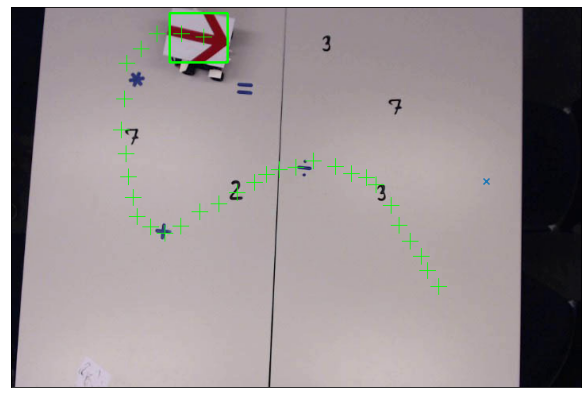

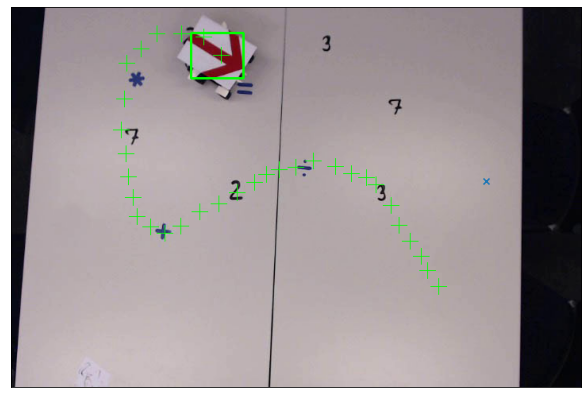

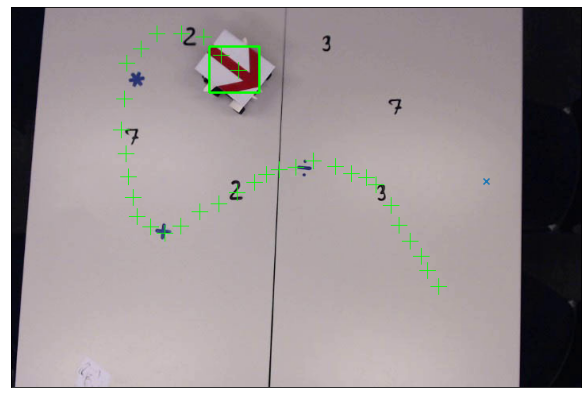

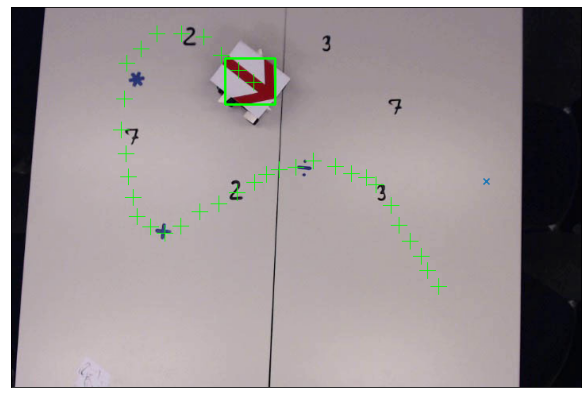

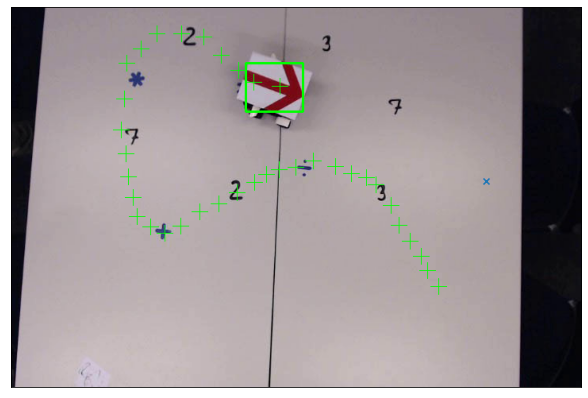

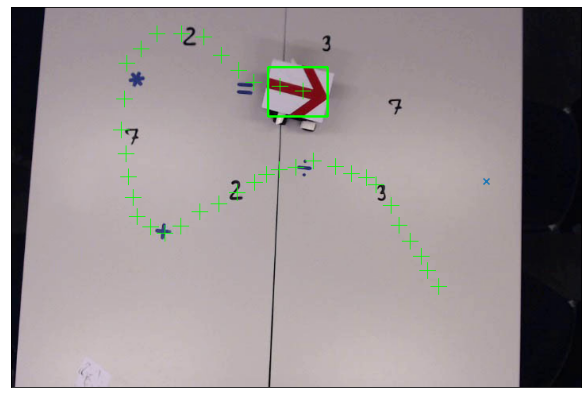

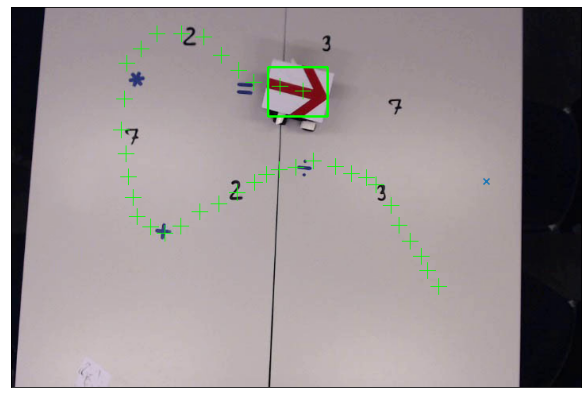

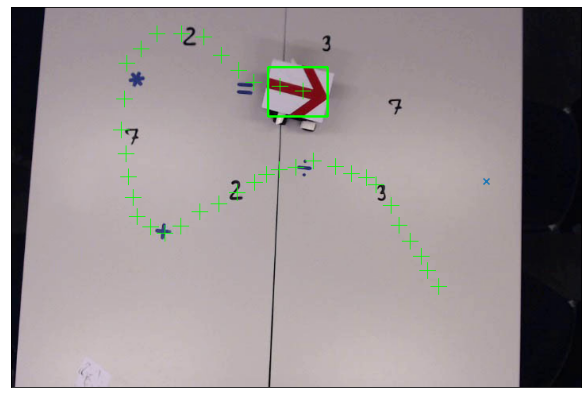

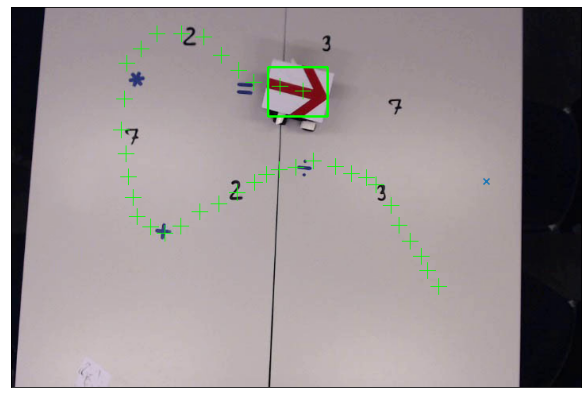

In [34]:
kernel = np.ones((5,5),np.uint8)
out = cv.VideoWriter('data/out.avi',cv.VideoWriter_fourcc(*'MJPG'), 4, (img.shape[1],img.shape[0]))
markers = []

for i in range(42):
    filename = 'data/frame/frame' + str(i) + '.jpeg'
    img = imread(filename)
    
    reds = img[:, :, 0]
    blues = img[:, :, 1]
    greens = img[:, :, 2]

    mask = np.array((blues < 100) & (greens < 100) & (reds > 100), dtype=np.uint8)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    
    process_im, contours, hierarchy = cv.findContours(mask,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

    areas = [cv.contourArea(c) for c in contours]
    max_index = np.argmax(areas)
    contour = contours[max_index]

    x,y,w,h = cv.boundingRect(contour)
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    markers.append(center(contour))
    
    for pos in markers:
        cv.drawMarker(img, pos, (0, 255, 0), thickness=1)

    out.write(cv.cvtColor(img, cv.COLOR_RGB2BGR))
    
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.imshow(img)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, img.shape[1], img.shape[0], 0])
    ax.scatter(test_x, test_y, marker='x')
    plt.show()

out.release()